In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [3]:
X,y = make_blobs(n_samples=1000,n_features=2,centers=3,random_state=987)

In [4]:
X

array([[-3.2671417 , -1.00647693],
       [ 8.84948975, -1.55775583],
       [ 4.36270721,  9.45807399],
       ...,
       [-2.6103206 , -3.7243378 ],
       [ 6.24615619,  6.6710626 ],
       [-0.85017407, -0.88808452]])

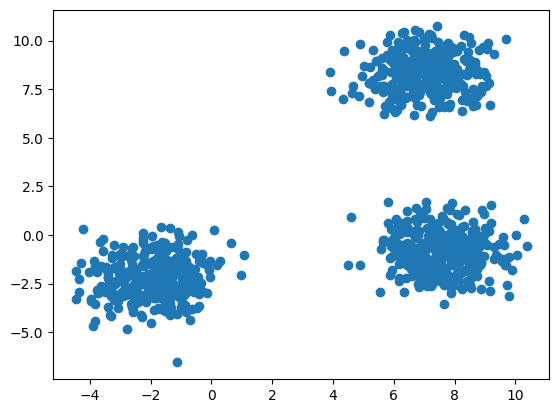

In [6]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [10]:
x_train.shape

(800, 2)

In [11]:
kmeans  = KMeans(n_clusters=3,init='k-means++')

In [12]:
wcss  =[]
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)
    

In [13]:
wcss

[13136.210550754351,
 1654.30590362981,
 1461.046995506475,
 1271.294095433867,
 1091.4017394400048,
 966.861961147587,
 836.2170793419305,
 729.2233448070339,
 678.4442965707993]

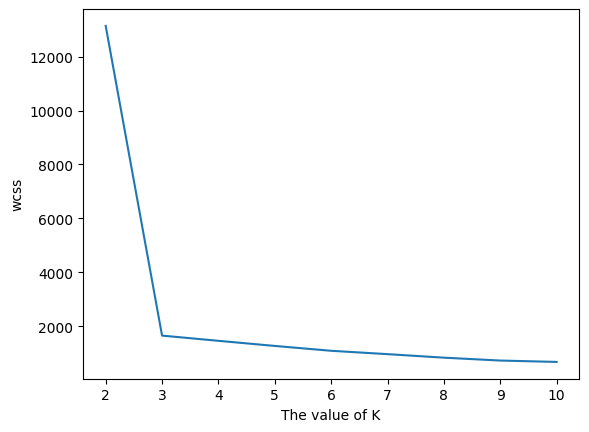

In [14]:
plt.plot(range(2,11),wcss)
plt.xlabel('The value of K')
plt.ylabel('wcss')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [18]:
y_label = kmeans.fit_predict(x_train)

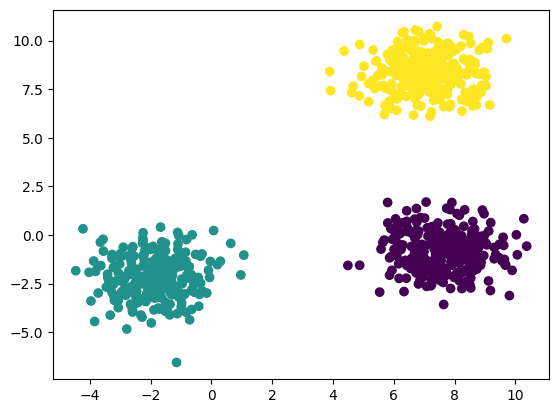

In [20]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_label)

In [21]:
y_test_label = kmeans.predict(x_train)

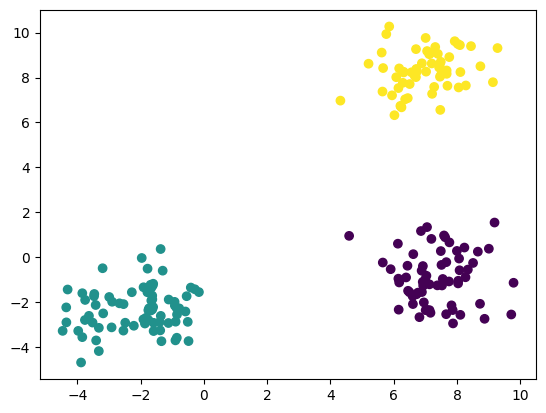

In [23]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test_label)

In [2]:
from kneed import KneeLocator

In [3]:
kl = KneeLocator(range(2,11),wcss,direction='decreasing',curve='concav')

NameError: name 'wcss' is not defined

In [27]:
kl.elbow

3

In [28]:
error = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x_train)
    score = silhouette_score(x_train,kmeans.labels_)
    error.append(score)

In [29]:
error

[0.6180259731490513,
 0.8031402156596815,
 0.6435787681673608,
 0.47877017806070027,
 0.3132832795612736,
 0.3277503285944836,
 0.33751430478407146,
 0.3414161673958705,
 0.33412291222982304]

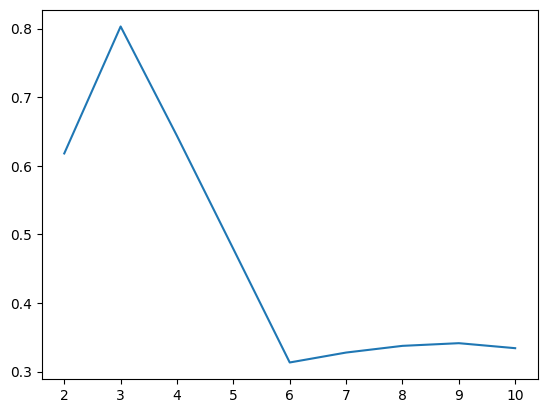

In [30]:
plt.plot(range(2,11),error)
plt.show()